## 지그재그의 데이터분석 !



<img src ="https://i.imgur.com/9zb1Cdh.jpg" width=700>

 


<img src = "https://i.imgur.com/chOEQhY.jpg" width=250>

 


---

## *set options

In [1]:
import pandas as pd

In [2]:
# 화면에 출력하는 데이터 프레임의 최대 row 수를 500으로 설정.
pd.set_option('display.max_rows', 500)

# 화면에 출력하는 데이터 프레임의 최대 column 수를 500으로 설정.
pd.set_option('display.max_columns', 500)

zigzag 데이터 테이블들을 모두 zigzag_DB.db 파일에 저장. database를 조회하고 그 중, order 테이블을 불러옴.

In [3]:
# python에서 DB를 다루는 library인 sqlite3와 데이터를 다루는 library인 padas를 import
import pandas as pd
import sqlite3

In [4]:

connect=sqlite3.connect("../zigzag_DB.db")
connect

In [5]:
query = "SELECT * FROM sqlite_master"
pd.read_sql(query,connect)

,type,name,tbl_name,rootpage,sql
0,table,order,order,3142,"CREATE TABLE ""order"" (\n""timestamp"" TEXT,\n ""..."
1,table,good,good,2,"CREATE TABLE ""good"" (\n""goods_id"" INTEGER,\n ..."
2,table,shop,shop,10,"CREATE TABLE ""shop"" (\n""shop_id"" INTEGER,\n ""..."
3,table,log,log,121,"CREATE TABLE ""log"" (\n""timestamp"" TEXT,\n ""us..."
4,table,user,user,18,"CREATE TABLE ""user"" (\n""user_id"" TEXT,\n ""os""..."


order 테이블의 각 행은 주문이 일어난 로그를 나타내며, 2018년 6월 11일 하루치 데이터가 주어졌다.

timestamp는 주문시각, user_id는 주문을 한 유저의 고유 아이디, goods_id는 상품의 id, shop_id는 쇼핑몰의 id, price는 상품의 가격을 나타냄

order 테이블을 이용해 지그재그의 당일 매출 상위 10개 쇼핑몰

order 테이블을 이용해 지그재그를 통해 이루어진 6월 11일의 쇼핑몰별 매출 정보

In [6]:
query = "SELECT * FROM 'order' "
order=pd.read_sql(query,connect)
print(order.shape)
order.head()

(867, 5)


,timestamp,user_id,goods_id,shop_id,price
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000


In [7]:
order['timestamp']=pd.to_datetime(order['timestamp'])

In [8]:
order.pivot_table(index='shop_id',values='price',aggfunc="sum").sort_values(by='price',ascending=False).head(10)

,price
shop_id,
22,1365200
14,872000
63,710700
32,707900
126,669400
6,655900
11,653000
60,558300
19,518400


**판매 건수를 포함한 피벗테이블과 상위 10개 쇼핑몰의 매출을 막대그래프로 나타냄.**

같은 횟수의 거래라도 제품의 가격이 비싸면 매출이 크게 나오게 있다. 상대적으로 저렴한 물품을 파는 쇼핑몰들은 결제 건수에 비해 매출이 적을 수 있으므로 매출 과 결제 건수를 함께 보도록 피벗테이블을 제작, 시각화

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
table=order.pivot_table(index='shop_id',values='price',aggfunc=["sum","count"])

In [11]:
table.columns=['sum','count']

In [12]:
table=table.sort_values(by="sum",ascending=False).head(10)

In [13]:
table

,sum,count
shop_id,,
22,1365200,99
14,872000,30
63,710700,27
32,707900,37
126,669400,39
6,655900,24
11,653000,19
60,558300,23
19,518400,19


In [14]:
top10_index=table.index
top10_index

Int64Index([22, 14, 63, 32, 126, 6, 11, 60, 19, 12], dtype='int64', name='shop_id')

** 시간대별 지그재그 매출을 lineplot을 이용하여 6월 11일의 시간대별 매출을 시각화.**

In [15]:
import matplotlib as mpl

sns.set_style('whitegrid') #스타일은 원하는 것을 사용하세요.
mpl.rc('font',family='Malgun Gothic')
# mpl.rc('font', family='AppleGothic') # Mac의 경우는 AppleGothic, 윈도우의 경우는 Malgun Gothic을 사용하면 됩니다 :) 
mpl.rc('axes', unicode_minus=False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

C:\Users\NOTE\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


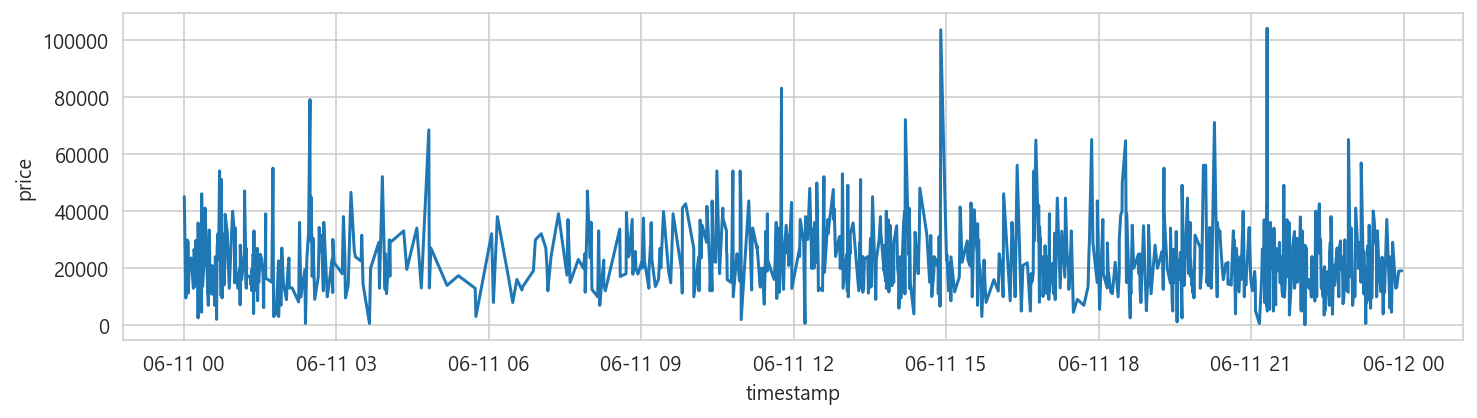

In [16]:
plt.figure(figsize=(12,3))
sns.lineplot(data=order,x='timestamp',y='price')

위의 시각화는 적절하지 못한 시각화이다. 정확하게는 x시 00분 ~ x시 59분 까지의 매출을 시간대별로 모두 합하는 binning 과정을 거친 뒤 시각화를 진행해야 원하는 결과를 얻어야 한다.


In [17]:
order['hour']=order['timestamp'].dt.hour

In [18]:
table=order.pivot_table(index='hour',values='price',aggfunc="sum")

In [19]:
table.head()

,price
hour,
0,1479210
1,990300
2,787830
3,467650
4,304800


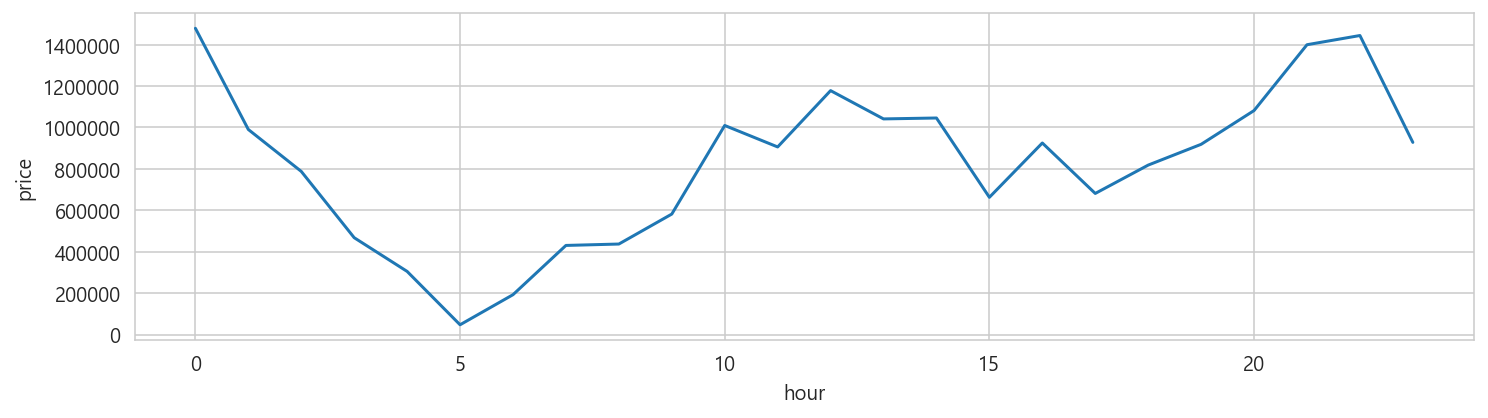

In [20]:
plt.figure(figsize=(12,3))
sns.lineplot(data=table,x=table.index,y='price')

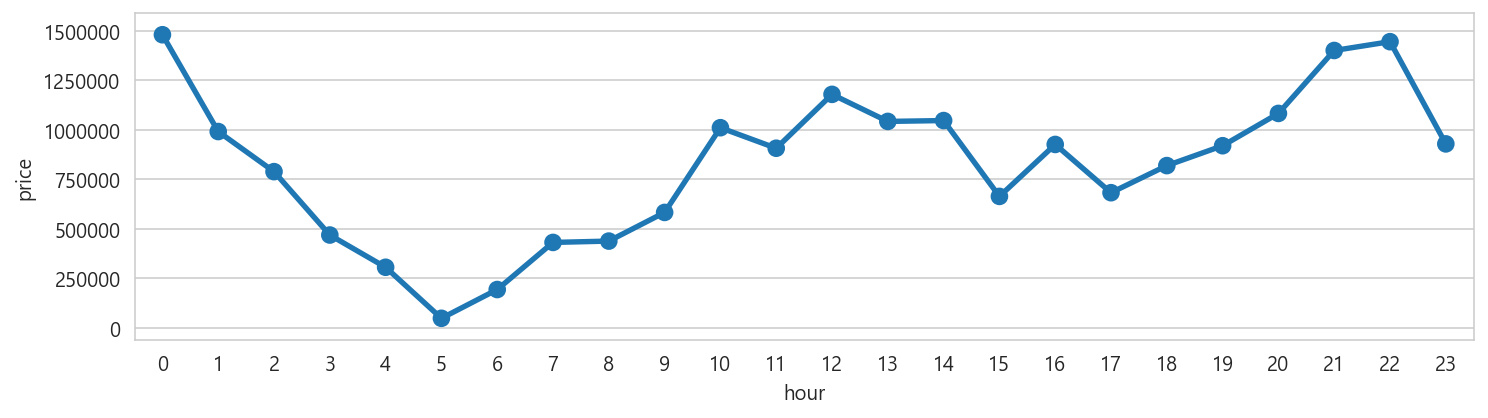

In [21]:
plt.figure(figsize=(12,3))
sns.pointplot(data=table,x=table.index,y='price')

In [22]:
import numpy as np

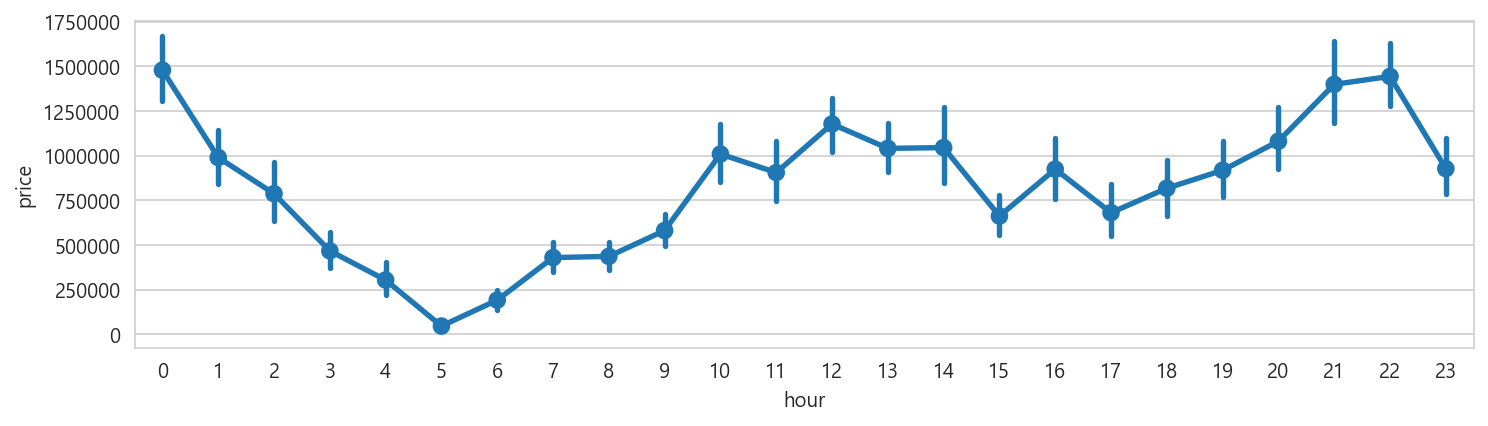

In [23]:
plt.figure(figsize=(12,3))
sns.pointplot(data=order,x="hour",y="price",estimator=np.sum)

**6 . user 테이블을 불러와 order 테이블과 병합.**

user 테이블에는 고객의 고유 아이디를 나타내는 user_id, 그리고 접속 기기정보를 나타내는 os, 그리고 나이정보 age가 있습니다. 이를 이용해 top 10 쇼핑몰 매출이 어떤 연령층에서 발생했는지 분석

In [24]:
query="SELECT * FROM 'user'"
user=pd.read_sql(query,connect)
user.head()

,user_id,os,age
0,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,And,41
1,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,iOS,31
2,-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN,iOS,16
3,-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1,And,41
4,-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k,And,42


In [25]:
user.shape

(10000, 3)

In [26]:
order.head(1)

,timestamp,user_id,goods_id,shop_id,price,hour
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0


In [27]:
merged_table=order.merge(user,on='user_id')

In [28]:
merged_table.head()

,timestamp,user_id,goods_id,shop_id,price,hour,os,age
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,iOS,39
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,And,17
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000,0,And,-1
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800,0,And,34
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000,0,And,17


**매출 Top 10 쇼핑몰 구매자들의 연령대를 쇼핑몰별로 시각화.**

위의 병합된 테이블을 이용하여, 당일 매출 Top 10 쇼핑몰에서 구매를 한 고객들의 연령대 분포를 시각화로 표현하고자 함. 이를 이용해 쇼핑몰이 설정한 타겟 연령대와 실제 구매층이 일치하는지를 비교.

나이 정보가 없는 경우는 -1이 입력되어 있기 때문에 이를 처리한 다음 시각화를 해야한다.

In [29]:
top10_table=merged_table[(merged_table["shop_id"].isin(top10_index)) & (merged_table['age']!=-1)]

In [30]:
top10_table.head()

,timestamp,user_id,goods_id,shop_id,price,hour,os,age
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,And,17
5,2018-06-11 00:05:35.182,GM0-EsJPHjkpteIpAQIwaCdUjU81lhW1,55,22,11200,0,iOS,21
6,2018-06-11 00:06:14.314,lgvWxrv7r5RGklXSJqM2x6NUBZ5H-RQZ,2451,22,19800,0,iOS,22
7,2018-06-11 00:08:39.716,LZZ0ktGq6hW685TFAQfcGNhsKVUEceHl,4278,60,23500,0,iOS,24
9,2018-06-11 00:11:30.954,Evz6xmsye1BP7i33rr_RAjwBRZ_AOsTZ,686,22,12900,0,And,27


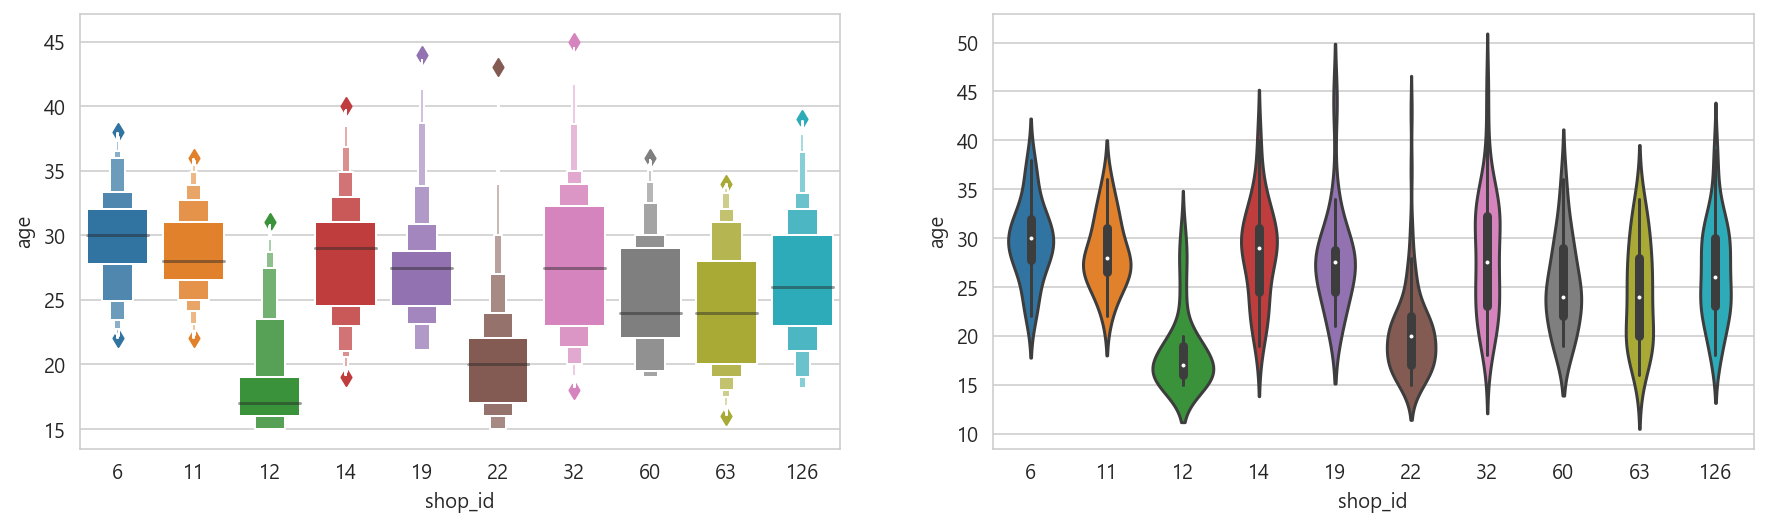

In [31]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2) 
fig.set_size_inches(15,4)
sns.boxenplot(data=top10_table,x='shop_id',y='age',ax=ax1)
sns.violinplot(data=top10_table,x='shop_id',y='age',ax=ax2)

**user 테이블에 연령대를 나타내는 컬럼을 만들어 쇼핑몰이 설정한 타겟 연령대와 실제로 구매를 한 고객의 연령과 일치하는지를 검증.**

지그재그의 쇼핑몰들은 아래의 필터에서 보여지는 것과 같이 타겟 연령대를 가지고 있다. 하지만, 실제 구매가 설정되어 있는 타겟 연령대에 맞게 이루어지는지 꾸준히 검증이 이루어져야 한다. 유저에게 더 적합한 제품이나 쇼핑몰을 추천해주어 유저 경험 (UX)를 증진시키는 것은 추천 플랫폼에게 매우 중요한 요소이다.

<img src="https://i.imgur.com/HMd9xC2.jpg" width=300>


    1. 실제 나이를 바탕으로 user 테이블에 연령대 칼럼을 만들기
    2. shop 테이블을 불러와 user, order 테이블과 병합하기
    3. 쇼핑몰의 타겟 연령대와 해당 쇼핑몰에서의 결제를 한 고객의 연령대를 비교하기

In [32]:
def make_generation(age):
    if age == -1:
        return '미입력'
    elif age // 10 >= 4:
        return "30대 후반"
    elif age // 10 == 1:
        return "10대"
    elif age % 10 < 3:
        return str(age // 10 * 10) + f"대 초반"
    elif age % 10 <= 6:
        return str(age // 10 * 10) + f"대 중반"
    else:
        return str(age // 10 * 10) + f"대 후반"

    
print(make_generation(10))
print(make_generation(23))
print(make_generation(29))
print(make_generation(32))
print(make_generation(35))
print(make_generation(40))

10대
20대 중반
20대 후반
30대 초반
30대 중반
30대 후반


In [33]:
user['연령대']=user['age'].apply(make_generation)

In [34]:
user['연령대'].head()

0    30대 후반
1    30대 초반
2       10대
3    30대 후반
4    30대 후반
Name: 연령대, dtype: object

In [35]:
query = "SELECT * FROM 'shop'"
shop=pd.read_sql(query,connect)
shop.head()

,shop_id,name,category,age,style
0,1,Edna,의류,20대 중반/20대 후반/30대 초반,모던시크/러블리
1,2,Pam,의류,20대 중반/20대 후반/30대 초반,러블리/심플베이직
2,3,Carolyn,의류,20대 중반/20대 후반/30대 초반,모던시크/심플베이직
3,4,Joan,의류,30대 초반/30대 중반,미시스타일/유니크
4,5,Florene,의류,20대 중반/20대 후반/30대 초반,심플베이직/헐리웃스타일


In [36]:
merged=order.merge(user,on="user_id").merge(shop,on="shop_id")

In [37]:
merged.head()

,timestamp,user_id,goods_id,shop_id,price,hour,os,age_x,연령대,name,category,age_y,style
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,iOS,39,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
1,2018-06-11 07:33:39.823,ni3NQK35j-YaSxli-C_Sz7ZmQqOwMljL,2278,38,37000,7,And,32,30대 초반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
2,2018-06-11 12:56:27.867,MnvhmV0tA89bN9TLXgRTbLza689bTkT9,5513,38,31000,12,And,37,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
3,2018-06-11 22:57:11.582,3Vo9NP0qU_176pgbqk6Cu-CY7kpJ2-WB,7026,38,17100,22,iOS,34,30대 중반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
4,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,And,17,10대,Rachel,의류,10대/20대 초반,러블리/심플베이직


In [38]:
def check_generation(row):
    if row['category'] == '의류' and row['연령대'] == '미입력':
        return True
    else:
        return row['연령대'] in str(row['age_y'])

In [39]:
merged['거래연령 일치여부']=merged.apply(check_generation,axis=1)

In [40]:
merged.head()

,timestamp,user_id,goods_id,shop_id,price,hour,os,age_x,연령대,name,category,age_y,style,거래연령 일치여부
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,iOS,39,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,False
1,2018-06-11 07:33:39.823,ni3NQK35j-YaSxli-C_Sz7ZmQqOwMljL,2278,38,37000,7,And,32,30대 초반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True
2,2018-06-11 12:56:27.867,MnvhmV0tA89bN9TLXgRTbLza689bTkT9,5513,38,31000,12,And,37,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,False
3,2018-06-11 22:57:11.582,3Vo9NP0qU_176pgbqk6Cu-CY7kpJ2-WB,7026,38,17100,22,iOS,34,30대 중반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True
4,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,And,17,10대,Rachel,의류,10대/20대 초반,러블리/심플베이직,True


In [41]:
merged_table=merged.pivot_table(index='shop_id',values="거래연령 일치여부",aggfunc=["mean",'count'])

In [42]:
merged_table[merged_table.index.isin(top10_index)]

,mean,count
,거래연령 일치여부,거래연령 일치여부
shop_id,,
6,0.750000,24
11,0.684211,19
12,0.857143,42
14,0.566667,30
19,0.789474,19
22,0.929293,99
32,0.540541,37
60,0.695652,23


의류이외의 제품을 파는 쇼핑몰은 타겟 연령층이 없기 떄문에 일치여부가 0이 나온다. 일치여부가 낮은 쇼핑몰의 경우는 더 긴 기간의 로그를 모니터링 한 다음, 태그 수정을 제안하여 타겟 적합도를 높일 수 있음.

**쇼핑몰의 스타일 태그를 정리.**

In [43]:
style_list = ['페미닌', '모던시크', '심플베이직', '러블리', '유니크', '미시스타일', '캠퍼스룩', '빈티지', '섹시글램', '스쿨룩', '로맨틱', '오피스룩',
              '럭셔리', '헐리웃스타일', '심플시크', '키치', '펑키', '큐티', '볼드&에스닉' ]

In [44]:
for i in style_list:
    shop[f"{i}"]=shop['style'].str.contains(i)

In [45]:
shop.head()

,shop_id,name,category,age,style,페미닌,모던시크,심플베이직,러블리,유니크,미시스타일,캠퍼스룩,빈티지,섹시글램,스쿨룩,로맨틱,오피스룩,럭셔리,헐리웃스타일,심플시크,키치,펑키,큐티,볼드&에스닉
0,1,Edna,의류,20대 중반/20대 후반/30대 초반,모던시크/러블리,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,Pam,의류,20대 중반/20대 후반/30대 초반,러블리/심플베이직,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3,Carolyn,의류,20대 중반/20대 후반/30대 초반,모던시크/심플베이직,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,4,Joan,의류,30대 초반/30대 중반,미시스타일/유니크,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,5,Florene,의류,20대 중반/20대 후반/30대 초반,심플베이직/헐리웃스타일,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


**스타일별 실제 구매 기록을 바탕으로 가장 구매가 많이 일어난 스타일 키워드를 찾은 뒤, 매출이 가장 많은 3가지 스타일의 구매 연령대 분포를 그린다.**


In [46]:
merged = (
    order.merge(shop, on='shop_id')
             .merge(user, on='user_id')
)
print(merged.shape)
merged.head(3)

(867, 32)


,timestamp,user_id,goods_id,shop_id,price,hour,name,category,age_x,style,페미닌,모던시크,심플베이직,러블리,유니크,미시스타일,캠퍼스룩,빈티지,섹시글램,스쿨룩,로맨틱,오피스룩,럭셔리,헐리웃스타일,심플시크,키치,펑키,큐티,볼드&에스닉,os,age_y,연령대
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,iOS,39,30대 후반
1,2018-06-11 07:33:39.823,ni3NQK35j-YaSxli-C_Sz7ZmQqOwMljL,2278,38,37000,7,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,And,32,30대 초반
2,2018-06-11 12:56:27.867,MnvhmV0tA89bN9TLXgRTbLza689bTkT9,5513,38,31000,12,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,And,37,30대 후반


In [47]:
style_table=merged.pivot_table(index='category',values=style_list,aggfunc="sum",margins=True).T

In [48]:
style_table.sort_values(by="All",ascending=False).head(3)

category,가방,란제리&파자마,비치웨어,빅사이즈,슈즈,액세서리,의류,임부복,커플룩,패션소품,All
심플베이직,0,0,0,0,0,0,457,0,3,0,460
러블리,0,0,0,2,0,0,369,0,0,0,371
모던시크,0,0,0,1,0,0,120,0,0,0,121


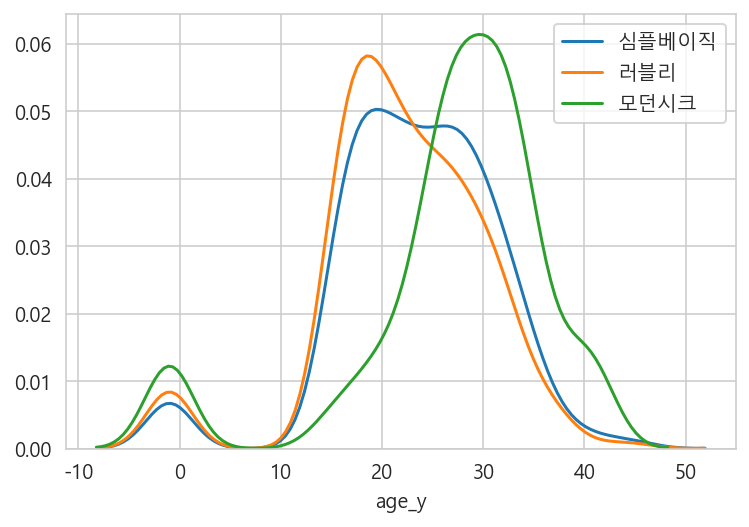

In [49]:
sns.distplot(merged.loc[merged['심플베이직'] == True, 'age_y'], label = '심플베이직', hist=False)
sns.distplot(merged.loc[merged['러블리'] == True, 'age_y'], label = '러블리', hist=False)
sns.distplot(merged.loc[merged['모던시크'] == True, 'age_y'], label = '모던시크', hist=False)

In [50]:
plt.savefig('dist.png', dpi=400)

<Figure size 432x288 with 0 Axes>

**DB에서 로그 데이터를 불러온 다음 timestamp 컬럼을 datetime 형식으로 바꾸고, user id를 보기 쉽게 간단한 자연수 형태로 변환.**

In [51]:
query="SELECT * from 'log'"
log=pd.read_sql(query,connect)
log['timestamp']=pd.to_datetime(log['timestamp'])
print(log.shape)
log.head()

(105815, 6)


,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id
0,2018-06-11 00:00:00.213,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_ranking,app_page_view,NaN,NaN
1,2018-06-11 00:00:00.810,lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3,shops_bookmark,app_page_view,NaN,NaN
2,2018-06-11 00:00:00.956,mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8,goods_search_result/로브,app_page_view,NaN,NaN
3,2018-06-11 00:00:01.084,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_bookmark,app_page_view,NaN,NaN
4,2018-06-11 00:00:01.561,Yjny5AchUWLiuv4kdeq50COF-S8OFXPd,shops_bookmark,app_page_view,NaN,NaN


지그재그 로그 데이터의 명세.


    - 컬럼 별 명세
        1. timestamp : 이벤트 발생 시간 (한국 시간 기준)
        2. user_id : 이용자 고유 식별자
        3. event_origin : 이벤트가 발생한 앱 위치
            - event_origin 값 별 의미
                a. goods_search_result : 특정 검색어의 상품 검색 결과
                    (Ex: goods_search_result/반팔티)
                b. shops_ranking : '쇼핑몰 랭킹' 영역
                c. shops_bookmark : '즐겨찾기' 영역
                d. category_search_result : 카테고리 검색 결과 
                    (Ex:category_search_result/상의)
                e. my_goods : '내 상품' 영역
                
        4. event_name : 발생한 이벤트 명
            - event_name 값 별 의미
                a. app_page_view : 앱 내 화면 이동
                b. enter_browser : 앱 내 클릭을 통해, 특정 웹페이지로 진입
                c. add_bookmark : 특정 쇼핑몰을 즐겨찾기 추가
                d. remove_bookmark : 특정 쇼핑몰을 즐겨찾기 제거
                e. add_my_goods : 특정 상품을 내 상품 추가
                f. remove_my_goods : 특정 상품을 내 상품 제거
                
        5. event_goods_id : 이벤트가 발생한 상품 고유 식별자
             - 상품 관련 이벤트가 아닌 경우, 공백
             
        6. event_shop_id : 이벤트가 발생한 쇼핑몰 고유 식별자
             - 쇼핑몰 관련 이벤트가 아닌 경우, 공백



user_id는 아래에서 확인할 수 있듯이 매우 복잡한 형태로 되어 있어 한눈에 파악하기 어렵다.


<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>user_id</th>
      <th>os</th>
      <th>age</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>--PYPMX8QWg0ioT5zfORmU-S5Lln0lot</td>
      <td>And</td>
      <td>41</td>
    </tr>
    <tr>
      <th>1</th>
      <td>-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv</td>
      <td>iOS</td>
      <td>31</td>
    </tr>
    <tr>
      <th>2</th>
      <td>-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN</td>
      <td>iOS</td>
      <td>16</td>
    </tr>
    <tr>
      <th>3</th>
      <td>-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1</td>
      <td>And</td>
      <td>41</td>
    </tr>
    <tr>
      <th>4</th>
      <td>-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k</td>
      <td>And</td>
      <td>42</td>
    </tr>
  </tbody>
</table>




앞으로의 분석을 용이하게 하기위하여 user_id을 간단하게 0, 1, 2, 3 ...과 같이 연속된 정수 형태로 변환해야 한다.

기존의 고객 아이디와 새롭게 만들 고객 아이디를 짝지어 딕셔너리로 만들고 이를 mapping하여 진행.

In [52]:
# 판다스의 unique() 기능을 이용하여 유저 아이디를 user_id라는 변수에 저장.


user_id=user['user_id'].unique()

In [53]:
#새로운 user_id는 연속된 자연수들로 지정. range()와 len()을 사용하여 user_id의 개수만큼의 연속된 정수 만든다.


In [54]:
user_id

array(['--PYPMX8QWg0ioT5zfORmU-S5Lln0lot',
       '-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv',
       '-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN', ...,
       'zz-aNy7UWfvyrZxO4Fs4K5ewmqZVaMOs',
       'zznj-LHhddVvuzZmbZpw6MSylLO64982',
       'zzxBQ7i7mttX0cv1GqFuuMstg7keEkdV'], dtype=object)

In [55]:
n_user_id=range(user['user_id'].size)

In [56]:
n_user_id

range(0, 10000)

In [57]:
#python 내장 함수인 zip()을 이용하여 기존의 id와 새로운 id를 묶음.
id_zip = zip(user_id, n_user_id)

print(id_zip)

In [58]:
#zip()의 결과를 구체적으로 보기 위하여 list로 변환하여 print. 상위 5개만 출력.
list(zip(user_id, n_user_id))[:5]


[('--PYPMX8QWg0ioT5zfORmU-S5Lln0lot', 0),
 ('-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv', 1),
 ('-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN', 2),
 ('-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1', 3),
 ('-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k', 4)]

In [59]:
#새로운 id와 기존의 id가 대응된 딕셔너리 타입 변수를 생성.
id_dict = dict(id_zip)
id_dict

{'--PYPMX8QWg0ioT5zfORmU-S5Lln0lot': 0,
 '-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv': 1,
 '-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN': 2,
 '-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1': 3,
 '-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k': 4,
 '-3fmY1WsLkYJwN_8lZQMmxZd6zJTAcT1': 5,
 '-3q-oynqxFEgSHUwX802hpmi1louyQNv': 6,
 '-428TMckUlhn6ptxN7gR2FGaSyXjSnaD': 7,
 '-4O8WnD8dT6nWho-4KbIm6TvnK4BmjX_': 8,
 '-4ltLPS55n6J2wSUCLxEZwxYdeW37cK5': 9,
 '-5BA0EwkyhGLCC8FxzvvDgyrZWYJM33I': 10,
 '-5Cwn2Fcx9j16QSM2-SLiaLMm0sS4E2I': 11,
 '-5o3lkvJctT3uURb5JWPVxe1VjqhyzAi': 12,
 '-622WUNWBtjX5VGKx8UnOtn2NVHD_NaB': 13,
 '-62U2A3KHjNZ2XXmOgQTSWEfPg1RRWWy': 14,
 '-63J8veARgGL3ulnRKblm4xhhwkvjKzG': 15,
 '-6UZWGgl3AAI7Df2sVWLX6oT6zP43zo0': 16,
 '-6jxyh56lSivkbLm3WNGRCmdyrdsBmNW': 17,
 '-71z4lG_D-eKnOmDCJlUaNvVcwd808yw': 18,
 '-75tFsDSoUwapUvwCUHTZiGTGkaSDleQ': 19,
 '-7SKUZkBmbG2ZMvJ0E0jmMDcd8PgmARb': 20,
 '-7uBbvfy4gff6mHV9XotjVO2YlCY2r8v': 21,
 '-8htVW7UIA8qRupSdCx-6PzIXLI_vk2p': 22,
 '-9qbSavSdufdw9JwmiWX1_URT2E2QxFZ': 23,
 '-Ae6T8G5uAZldwUEOTMR-KzG

In [60]:
id_dict['--PYPMX8QWg0ioT5zfORmU-S5Lln0lot']

0

In [61]:
order.head(1)

,timestamp,user_id,goods_id,shop_id,price,hour
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0


In [62]:
user.head(1)

,user_id,os,age,연령대
0,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,And,41,30대 후반


In [63]:
# data_logs, order, user에 id_idct를 mapping하여 각 데이터 프레임에 새로운 고객 id컬럼인 n_user_id를 만든다.


log["n_user_id"] = log['user_id'].map(id_dict)
order["n_user_id"] = order['user_id'].map(id_dict)
user["n_user_id"] = user['user_id'].map(id_dict)


log[['user_id', 'n_user_id']].head()

,user_id,n_user_id
0,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,3314
1,lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3,7844
2,mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8,7920
3,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,3314
4,Yjny5AchUWLiuv4kdeq50COF-S8OFXPd,5608


In [64]:
order.iloc[0]

timestamp          2018-06-11 00:00:43.032000
user_id      bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx
goods_id                                 1414
shop_id                                    38
price                                   45000
hour                                        0
n_user_id                                6241
Name: 0, dtype: object

In [65]:
log.loc[log["user_id"] == "bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx"]

,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id,n_user_id
878,2018-06-11 00:06:45.357,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨,app_page_view,NaN,NaN,6241
901,2018-06-11 00:06:54.034,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,app_page_view,NaN,NaN,6241
1062,2018-06-11 00:08:00.579,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,enter_browser,2048.0,46.0,6241
1259,2018-06-11 00:09:38.881,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,app_page_view,NaN,NaN,6241
1439,2018-06-11 00:11:04.446,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,enter_browser,3486.0,38.0,6241
1473,2018-06-11 00:11:20.354,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,app_page_view,NaN,NaN,6241
1526,2018-06-11 00:11:48.284,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,enter_browser,4006.0,24.0,6241
2423,2018-06-11 00:18:21.906,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,app_page_view,NaN,NaN,6241
2529,2018-06-11 00:19:01.928,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨,app_page_view,NaN,NaN,6241
2758,2018-06-11 00:20:30.432,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,shops_bookmark,app_page_view,NaN,NaN,6241


In [66]:
order.loc[order["user_id"] == "bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx"]

,timestamp,user_id,goods_id,shop_id,price,hour,n_user_id
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,6241


00시 37분에 마지막 log가 기록되어 있다. 이 기록을 바탕으로 해당 고객은 쇼핑몰 즐겨찾기 목록에서 특정 쇼핑몰을 클릭하여 들어간다음 43분에 린넨바지를 구매한 것을 유추. 

사람들이 구매를 하도록 유도하는 것이 최종 목표이기 때문에, 로그기록과 구매기록을 연결하는 것은 중요하다. 하지만, 로그 테이블에는 이 사람이 구매를 했는지에 대한 정보가 전혀 없기 때문에 order 테이블과 log 테이블을 병합해야할 필요가 있다.

기록 중에, 주문을 했지만 그 전의 로그 정보가 전혀 없는 고객들이 있다. 시간 대를 살펴봤을 때, 이들은 전날에 로그 기록이 존재하고 6월 11일 자정 이후 결제를 한 것으로 추론된다. 

In [67]:

user_set = set(order['user_id'])
user_number_order = len(user_set)
log_set = set(log['user_id'])
user_number_log = len(log_set)
user_duplicated = user_set & log_set

print('해당 날짜에 구매한 총 고객수 입니다 :',user_number_order, end ='명\n')
print('해당 날짜 log데이터에 기록된 총 고객수입니다 :',user_number_log,  end ='명\n')
print('중복되는 고객수입니다 :', len(user_duplicated) , end ='명\n')

해당 날짜에 구매한 총 고객수 입니다 : 832명
해당 날짜 log데이터에 기록된 총 고객수입니다 : 9909명
중복되는 고객수입니다 : 742명


In [68]:
print(order.columns)
print(log.columns)

Index(['timestamp', 'user_id', 'goods_id', 'shop_id', 'price', 'hour',
       'n_user_id'],
      dtype='object')
Index(['timestamp', 'user_id', 'event_origin', 'event_name', 'event_goods_id',
       'event_shop_id', 'n_user_id'],
      dtype='object')


In [69]:
order_copy = order.copy()

In [70]:
order_copy = order_copy[order_copy['user_id'].isin(user_duplicated)]
order_copy['event_origin'] = order_copy['shop_id']
order_copy['event_name'] = 'purchase'

order_copy['event_goods_id'] = order_copy['goods_id']

order_copy = order_copy[['timestamp', 'n_user_id', 'user_id','event_origin',
         'event_name', 'event_goods_id', 'price']]

order_copy.head()


,timestamp,n_user_id,user_id,event_origin,event_name,event_goods_id,price
0,2018-06-11 00:00:43.032,6241,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,38,purchase,1414,45000
1,2018-06-11 00:02:33.763,8899,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,12,purchase,1351,9500
4,2018-06-11 00:05:26.010,7832,lq1Je3voA3a0MouSFba3629lKCvweI24,89,purchase,5572,29000
5,2018-06-11 00:05:35.182,2745,GM0-EsJPHjkpteIpAQIwaCdUjU81lhW1,22,purchase,55,11200
6,2018-06-11 00:06:14.314,7800,lgvWxrv7r5RGklXSJqM2x6NUBZ5H-RQZ,22,purchase,2451,19800


In [71]:

log_order = pd.concat([log, order_copy], sort = False)

log_order.shape

(106587, 8)

----

In [72]:

log_order['purchase'] = log_order["price"].notnull()

log_order.head()

,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id,n_user_id,price,purchase
0,2018-06-11 00:00:00.213,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_ranking,app_page_view,NaN,NaN,3314,NaN,False
1,2018-06-11 00:00:00.810,lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3,shops_bookmark,app_page_view,NaN,NaN,7844,NaN,False
2,2018-06-11 00:00:00.956,mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8,goods_search_result/로브,app_page_view,NaN,NaN,7920,NaN,False
3,2018-06-11 00:00:01.084,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_bookmark,app_page_view,NaN,NaN,3314,NaN,False
4,2018-06-11 00:00:01.561,Yjny5AchUWLiuv4kdeq50COF-S8OFXPd,shops_bookmark,app_page_view,NaN,NaN,5608,NaN,False


----

In [73]:

log_order = log_order.sort_values(by = ['user_id', 'timestamp']).reset_index(drop =True)

log_order.head()

,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id,n_user_id,price,purchase
0,2018-06-11 15:57:10.615,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,shops_bookmark,app_page_view,NaN,NaN,0,NaN,False
1,2018-06-11 15:59:05.505,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,shops_bookmark,app_page_view,NaN,NaN,0,NaN,False
2,2018-06-11 00:55:37.309,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,my_goods,app_page_view,NaN,NaN,1,NaN,False
3,2018-06-11 00:55:44.430,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,my_goods,enter_browser,2506.0,40.0,1,NaN,False
4,2018-06-11 01:00:33.295,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,my_goods,app_page_view,NaN,NaN,1,NaN,False


** 동일한 사용자에 대한 연속한 로그들 사이의 시간 간격**

고객별 연속한 log사이의 시간 간격을 log duration으로 정의. 이는 고객의 잔존시간을 구하는 것으로 연결.

현재 제공된 데이터에서는 고객이 앱을 종료하는 기록이 없기 때문에 마지막 log의 log_duration은 0이라고 가정.

In [74]:
log_order['timestamp']=pd.to_datetime(log_order['timestamp'])

In [75]:
log_order['timestamp']

0        2018-06-11 15:57:10.615
1        2018-06-11 15:59:05.505
2        2018-06-11 00:55:37.309
3        2018-06-11 00:55:44.430
4        2018-06-11 01:00:33.295
                   ...          
106582   2018-06-11 22:49:05.683
106583   2018-06-11 22:53:40.174
106584   2018-06-11 23:01:25.111
106585   2018-06-11 23:02:30.181
106586   2018-06-11 23:03:43.382
Name: timestamp, Length: 106587, dtype: datetime64[ns]

timestamp_after 컬럼은 다음 log의 timestamp값을 갖는다.

고객별로 groupby()한 뒤 shift(-1)을 적용한 결과를 timestamp_afterdp 저장. 

groupby를 하고 shift를 하면 고객의 당일 마지막 로그의 timestamp_after은 NaT(Not a Time)값을 갖는다.


In [76]:
log_order['timestamp_after']=log_order.groupby(["n_user_id"])['timestamp'].shift(-1)

In [77]:
log_order.head()

,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id,n_user_id,price,purchase,timestamp_after
0,2018-06-11 15:57:10.615,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,shops_bookmark,app_page_view,NaN,NaN,0,NaN,False,2018-06-11 15:59:05.505
1,2018-06-11 15:59:05.505,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,shops_bookmark,app_page_view,NaN,NaN,0,NaN,False,NaT
2,2018-06-11 00:55:37.309,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,my_goods,app_page_view,NaN,NaN,1,NaN,False,2018-06-11 00:55:44.430
3,2018-06-11 00:55:44.430,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,my_goods,enter_browser,2506.0,40.0,1,NaN,False,2018-06-11 01:00:33.295
4,2018-06-11 01:00:33.295,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,my_goods,app_page_view,NaN,NaN,1,NaN,False,2018-06-11 01:11:03.608


timestamp_after과 timestamp의 차이를 계산하여 log_duration을 구한다. NaT 값은 연산시 NaN값이 된다. 이후에 NaN값은 0으로 너흔다.

----


In [78]:

log_order['log_duration']= (log_order['timestamp_after']-log_order['timestamp']).fillna(0)

C:\Users\NOTE\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing integers to fillna is deprecated, will raise a TypeError in a future version.  To retain the old behavior, pass pd.Timedelta(seconds=n) instead.
  """Entry point for launching an IPython kernel.


In [79]:
log_order[['n_user_id','timestamp','timestamp_after','log_duration']].head()

,n_user_id,timestamp,timestamp_after,log_duration
0,0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,00:01:54.890000
1,0,2018-06-11 15:59:05.505,NaT,00:00:00
2,1,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,00:00:07.121000
3,1,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,00:04:48.865000
4,1,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,00:10:30.313000


----

In [80]:

log_order['log_duration']=log_order['log_duration'].map(lambda x : x.total_seconds() ).astype('float')

In [81]:
log_order[['n_user_id','timestamp','timestamp_after','log_duration']].head()

,n_user_id,timestamp,timestamp_after,log_duration
0,0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114.890
1,0,2018-06-11 15:59:05.505,NaT,0.000
2,1,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7.121
3,1,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288.865
4,1,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630.313


**고객이 한 번 앱에 들어와서 활동하는 시간인 잔존시간을 구하기 위해 cycle을 구한다**

고객이 한번 app에 접속하여 나가기까지의 일련의 활동을 cycle이라 한다.

cycle을 구하기 위해서 고객이 cycle을 종료하고 앱을 나갔는지 여부(boolean)인 is_out이라는 컬럼생성. 
    
    조건 1) log_duration이 0이면 고객의 당일 마지막 log.
    
    조건 2) log간 간격이 40분이상이면 고객이 한 cycle이 종료하고 다음 cycle로 돌아온 것.

    
   




In [82]:
log_order['is_out']=((log_order['log_duration']==0) | (log_order['log_duration']>=2400))


In [83]:
log_order[['n_user_id','timestamp','timestamp_after','log_duration','is_out']].head()

,n_user_id,timestamp,timestamp_after,log_duration,is_out
0,0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114.890,False
1,0,2018-06-11 15:59:05.505,NaT,0.000,True
2,1,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7.121,False
3,1,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288.865,False
4,1,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630.313,False


log_duration이 2400이상 또는 음수인 log들은 cycle의 마지막 log.

In [84]:
log_order.loc[log_order['is_out']==True,'log_duration']=0

In [85]:

log_order[['n_user_id','timestamp', 'timestamp_after', 'log_duration', 'is_out']].head(20)

,n_user_id,timestamp,timestamp_after,log_duration,is_out
0,0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114.890,False
1,0,2018-06-11 15:59:05.505,NaT,0.000,True
2,1,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7.121,False
3,1,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288.865,False
4,1,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630.313,False
5,1,2018-06-11 01:11:03.608,2018-06-11 01:11:05.713,2.105,False
6,1,2018-06-11 01:11:05.713,2018-06-11 01:12:09.565,63.852,False
7,1,2018-06-11 01:12:09.565,2018-06-11 01:12:28.850,19.285,False
8,1,2018-06-11 01:12:28.850,NaT,0.000,True
9,2,2018-06-11 02:21:04.848,2018-06-11 02:21:18.719,13.871,False


----

이제 cycle을 구하여 번호를 부여.

번호는 cycle별 고유 번호(cycle_idx_unique)와 고객별 0부터 시작하는 daily cycle 번호(cycle_idx_daily)를 부여한다.

In [86]:
log_order['cycle_idx_unique'] = (log_order['is_out']
                                 .cumsum()
                                 .shift(1)
                                 .fillna(0)
                                 .astype(int)
                                )

log_order[['n_user_id','timestamp', 'timestamp_after', 'log_duration', 'is_out', 'cycle_idx_unique']].head(30)

,n_user_id,timestamp,timestamp_after,log_duration,is_out,cycle_idx_unique
0,0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114.890,False,0
1,0,2018-06-11 15:59:05.505,NaT,0.000,True,0
2,1,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7.121,False,1
3,1,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288.865,False,1
4,1,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630.313,False,1
5,1,2018-06-11 01:11:03.608,2018-06-11 01:11:05.713,2.105,False,1
6,1,2018-06-11 01:11:05.713,2018-06-11 01:12:09.565,63.852,False,1
7,1,2018-06-11 01:12:09.565,2018-06-11 01:12:28.850,19.285,False,1
8,1,2018-06-11 01:12:28.850,NaT,0.000,True,1
9,2,2018-06-11 02:21:04.848,2018-06-11 02:21:18.719,13.871,False,2


이번엔 daily cycle 번호를 부여하겠습니다.

In [87]:
log_order['cycle_idx_daily'] = (log_order.groupby('n_user_id')['is_out']
                                           .cumsum()
                                           .shift(1)
                                           .fillna(0)
                                           .astype(int)
                                            )

head_index = log_order.groupby('n_user_id')['cycle_idx_daily'].head(1).index
log_order.loc[head_index, 'cycle_idx_daily'] = 0

log_order[['n_user_id','timestamp', 'timestamp_after', 'log_duration', 'is_out','cycle_idx_daily']].head(30)

,n_user_id,timestamp,timestamp_after,log_duration,is_out,cycle_idx_daily
0,0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114.890,False,0
1,0,2018-06-11 15:59:05.505,NaT,0.000,True,0
2,1,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7.121,False,0
3,1,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288.865,False,0
4,1,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630.313,False,0
5,1,2018-06-11 01:11:03.608,2018-06-11 01:11:05.713,2.105,False,0
6,1,2018-06-11 01:11:05.713,2018-06-11 01:12:09.565,63.852,False,0
7,1,2018-06-11 01:12:09.565,2018-06-11 01:12:28.850,19.285,False,0
8,1,2018-06-11 01:12:28.850,NaT,0.000,True,0
9,2,2018-06-11 02:21:04.848,2018-06-11 02:21:18.719,13.871,False,0




**cycle별 log 수(접속별 활동 개수)**, **user별 cycle당 평균 log수(고객별 접속당 평균 활동수)**


 cycle별 log 수(접속별 활동 개수)

In [88]:
cycle_log_count = (log_order
                 .groupby(['n_user_id', 'cycle_idx_daily']) 
                 .size() 
                 .reset_index()
                 .rename(columns = { 0 : "log_count"} ))

cycle_log_count.head(5)

,n_user_id,cycle_idx_daily,log_count
0,0,0,2
1,1,0,7
2,2,0,13
3,2,1,4
4,2,2,31


user별 cycle당 평균 log수의 평균(고객별 접속당 평균 활동수)

In [89]:
cycle_user_log_count = (
                        cycle_log_count
                        .groupby('n_user_id')['log_count']
                        .mean()
                        .reset_index()
                        .rename(columns = {'log_count' : 'log_count_mean'})
                    )

cycle_user_log_count.head(20)

,n_user_id,log_count_mean
0,0,2.000000
1,1,7.000000
2,2,16.000000
3,3,7.750000
4,4,2.000000
5,5,1.000000
6,6,9.000000
7,7,3.000000
8,8,19.800000
9,9,14.000000


 하루동안 가장 많은 cycle을 갖는(가장 많이 활동한) 상위 5명의 user

In [90]:

cycle_user_log_count.sort_values(by = 'log_count_mean').tail()

,n_user_id,log_count_mean
3643,3675,76.0
4181,4215,81.0
6085,6140,81.0
1421,1435,97.0
1123,1135,151.0


In [91]:
log_order.groupby(["n_user_id"])['cycle_idx_daily'].nunique().sort_values().tail()


n_user_id
6234     9
2424     9
2249    10
6010    10
5847    11
Name: cycle_idx_daily, dtype: int64

### **잔존시간**

잔존시간이란 고객이 앱에서 머문 시간을 뜻합니다.

광고를 고객을 통해 app으로의 유입을 성공해다면 그 다음 목표는 방문자를 계속 머물게 하여 전환으로 이어질 수 있도록 하는것이다.
잔존 시간을 이용하여 통해 어떤 채널을 이용한 고객 또는 어떤 광고를 통해 유입된 고객이 웹사이트/app에 오래 머물고 제품을 구매하는지에 대한 분석 또는 시간대/요일별 노출전략을 세우는 등 다양한 insight를 얻을 수 있다.



### user별 잔존시간



In [92]:
remaining_time_cycle = (log_order.groupby(['n_user_id', 'cycle_idx_daily'])['log_duration']
                         .sum()
                         .reset_index()
                         .rename(columns = {'log_duration' : 'remaining_time'})
                       )

remaining_time_cycle.head(10)


,n_user_id,cycle_idx_daily,remaining_time
0,0,0,114.890
1,1,0,1011.541
2,2,0,893.742
3,2,1,69.618
4,2,2,3075.422
5,3,0,0.000
6,3,1,45.911
7,3,2,85.183
8,3,3,1711.031
9,4,0,49.130


In [93]:


duration_user = remaining_time_cycle.groupby("n_user_id")['remaining_time'].mean()

duration_user.to_frame().head()

,remaining_time
n_user_id,
0,114.890000
1,1011.541000
2,1346.260667
3,460.531250
4,49.130000


### 구매/비구매 cycle별 평균 잔존시간 구하기

In [94]:
cycle_purchase = log_order.loc[log_order['purchase']==True, 'cycle_idx_unique'].unique()

cycle_purchase

array([    4,    15,    16,    19,    88,    92,   123,   168,   192,
         232,   234,   337,   393,   397,   416,   429,   437,   491,
         500,   516,   554,   566,   592,   618,   626,   631,   682,
         707,   708,   727,   742,   756,   783,   792,   801,   819,
         832,   853,   860,   872,   943,  1008,  1020,  1053,  1088,
        1093,  1135,  1144,  1184,  1210,  1230,  1261,  1283,  1291,
        1324,  1330,  1384,  1386,  1404,  1413,  1422,  1455,  1461,
        1537,  1539,  1595,  1624,  1655,  1719,  1735,  1756,  1763,
        1764,  1771,  1799,  1801,  1802,  1805,  1807,  1833,  1915,
        1919,  1930,  1952,  1963,  2026,  2028,  2037,  2063,  2072,
        2093,  2104,  2112,  2160,  2195,  2212,  2242,  2254,  2266,
        2282,  2290,  2295,  2313,  2322,  2343,  2344,  2405,  2431,
        2441,  2466,  2468,  2510,  2547,  2551,  2565,  2575,  2585,
        2591,  2664,  2700,  2711,  2716,  2724,  2736,  2748,  2753,
        2844,  2876,

---

In [95]:
data_purchase = log_order.loc[log_order['cycle_idx_unique'].isin(cycle_purchase)]
data_npurchase = log_order.loc[~log_order['cycle_idx_unique'].isin(cycle_purchase)]

In [96]:
data_purchase

,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id,n_user_id,price,purchase,timestamp_after,log_duration,is_out,cycle_idx_unique,cycle_idx_daily
26,2018-06-11 22:27:56.017,-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN,my_goods,app_page_view,NaN,NaN,2,NaN,False,2018-06-11 22:27:58.920,2.903,False,4,2
27,2018-06-11 22:27:58.920,-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN,shops_bookmark,app_page_view,NaN,NaN,2,NaN,False,2018-06-11 22:27:59.632,0.712,False,4,2
28,2018-06-11 22:27:59.632,-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN,my_goods,app_page_view,NaN,NaN,2,NaN,False,2018-06-11 22:28:04.500,4.868,False,4,2
29,2018-06-11 22:28:04.500,-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN,shops_bookmark,app_page_view,NaN,NaN,2,NaN,False,2018-06-11 22:28:10.860,6.360,False,4,2
30,2018-06-11 22:28:10.860,-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN,shops_bookmark,app_page_view,NaN,NaN,2,NaN,False,2018-06-11 22:28:37.770,26.910,False,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106553,2018-06-11 22:48:26.282,zz-aNy7UWfvyrZxO4Fs4K5ewmqZVaMOs,shops_bookmark,app_page_view,NaN,NaN,9997,NaN,False,2018-06-11 22:48:27.031,0.749,False,17036,0
106554,2018-06-11 22:48:27.031,zz-aNy7UWfvyrZxO4Fs4K5ewmqZVaMOs,shops_bookmark,app_page_view,NaN,NaN,9997,NaN,False,2018-06-11 22:48:27.825,0.794,False,17036,0
106555,2018-06-11 22:48:27.825,zz-aNy7UWfvyrZxO4Fs4K5ewmqZVaMOs,shops_bookmark,app_page_view,NaN,NaN,9997,NaN,False,2018-06-11 22:49:17.581,49.756,False,17036,0
106556,2018-06-11 22:49:17.581,zz-aNy7UWfvyrZxO4Fs4K5ewmqZVaMOs,shops_bookmark,app_page_view,NaN,NaN,9997,NaN,False,2018-06-11 22:49:23.194,5.613,False,17036,0


---

data_purchase를 이용하여 구매 cycle의 잔존시간을 구해준다.

In [97]:
purchase_cycle_duration = (
                    data_purchase
                    .groupby(['n_user_id', 'cycle_idx_unique'])['log_duration']
                    .sum()
                    .reset_index()
                    .rename(columns = {"log_duration" : 'cycle_duration'})
                )

purchase_cycle_duration.head(10)

,n_user_id,cycle_idx_unique,cycle_duration
0,2,4,3075.422
1,8,15,412.025
2,8,16,1791.231
3,9,19,1657.393
4,47,88,3116.367
5,49,92,2615.611
6,65,123,3093.858
7,86,168,1906.721
8,97,192,3031.770
9,117,232,1191.110


In [98]:

npurchase_cycle_duration = (
                    data_npurchase
                    .groupby(['n_user_id', 'cycle_idx_unique'])['log_duration']
                    .sum()
                    .reset_index()
                    .rename(columns = {"log_duration" : 'cycle_duration'})
                )

npurchase_cycle_duration.head(10)

,n_user_id,cycle_idx_unique,cycle_duration
0,0,0,114.890
1,1,1,1011.541
2,2,2,893.742
3,2,3,69.618
4,3,5,0.000
5,3,6,45.911
6,3,7,85.183
7,3,8,1711.031
8,4,9,49.130
9,5,10,0.000


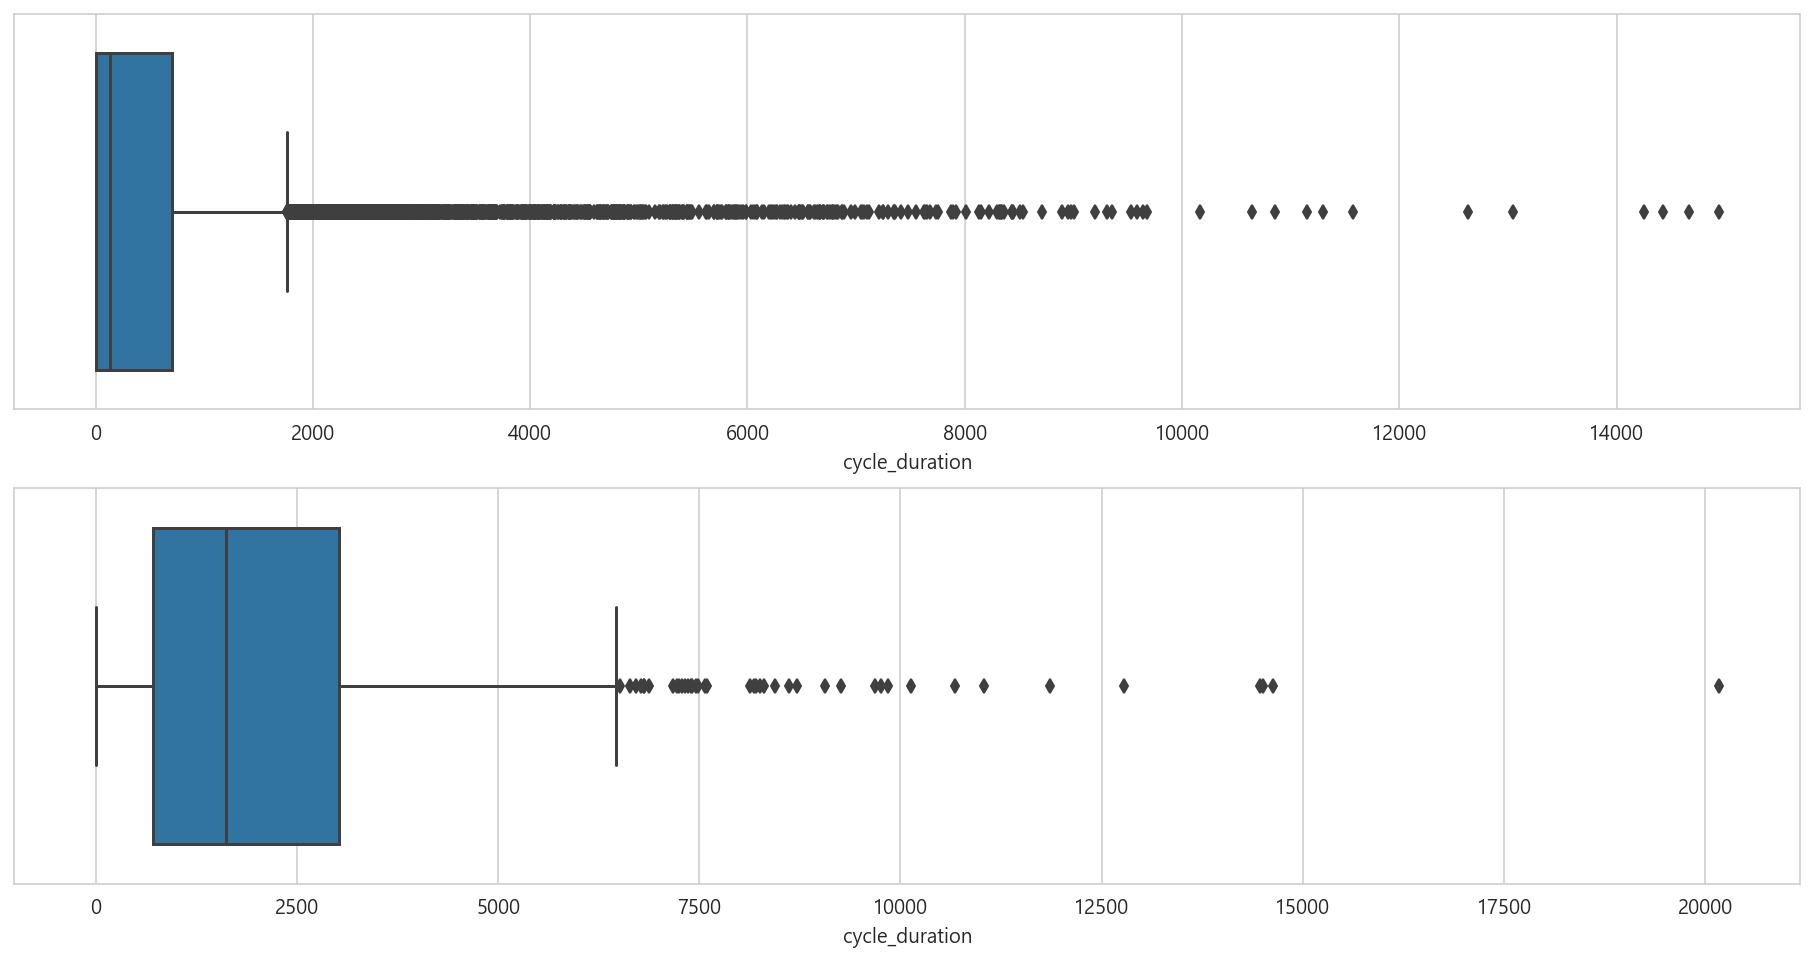

In [99]:

figure, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1)

figure.set_size_inches(16,8)

sns.boxplot(data = npurchase_cycle_duration, x = "cycle_duration", ax = ax1)
sns.boxplot(data = purchase_cycle_duration, x = "cycle_duration", ax = ax2)

In [100]:
purchase_cycle_mean = purchase_cycle_duration['cycle_duration'].mean()
npurchase_cycle_mean = npurchase_cycle_duration['cycle_duration'].mean()

print("구매 session 잔존 시간 평균:",purchase_cycle_mean)
print("비구매 session 잔존 시간 평균:",npurchase_cycle_mean)

구매 session 잔존 시간 평균: 2280.0800799999997
비구매 session 잔존 시간 평균: 611.9902027010454
